# Previsão do Tempo da Amazônia  
## Previsão do Tempo – Histórico (Março 2025)

**Nome do Dataset:**  
Previsão do Tempo da Amazônia: Previsão do Tempo – Histórico (Mar 2025)

**Link:**  
https://dados.gov.br/dados/conjuntos-dados/previsao-climatica-do-censipam

**Órgão responsável:**  
Ministério da Defesa

**Descrição:**  
Dados relacionados ao histórico de previsão do tempo da Amazônia disponibilizados pelo CENSIPAM/MD, referentes ao mês de março de 2025.

### Estrutura do Dataset

- **Número de colunas:** 10  
- **Número de registros:** 9123

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
df_weather = pd.read_csv('previsaoMar2025.csv')

df_weather.head(5)

,Data,Cidade,Condicao_do_Tempo_Prevista,Temperatura_Tendencia,Temperatura_Minima,Temperatura_Maxima,Vento_Velocidade_Minima,Vento_Velocidade_Maxima,Vento_Direcao,Vento_Intensidade
0,01/03/2025,Abaetetuba - PA,Nublado com chuva a tarde,Estavel,23,30,76,100,NE,Fracos
1,02/03/2025,Abaetetuba - PA,Nublado com chuva a tarde,Estavel,23,30,79,100,NE,Fracos
2,03/03/2025,Abaetetuba - PA,Nublado com chuva entre o final da tarde e o i...,Estavel,23,30,74,100,NE,Fracos
3,07/03/2025,Abaetetuba - PA,Nublado com chuva e trovoadas a qualquer hora ...,Declinio,22,28,75,100,E - NE,Fracos/Moderados
4,08/03/2025,Abaetetuba - PA,Parcialmente nublado a nublado com pancadas de...,Elevacao,23,30,60,100,E - NE,Fracos/Moderados


In [150]:
df_weather = df_weather.rename(columns={
    ' Condicao_do_Tempo_Prevista': 'Condição do Tempo Prevista',
    'Temperatura_Tendencia': 'Temperatura Tendência',
    'Temperatura_Minima': 'Temperatura Mínima',
    'Temperatura_Maxima': 'Temperatura Máxima',
    'Vento_Velocidade_Minima': 'Vento Velocidade Mínima',
    'Vento_Velocidade_Maxima': 'Vento Velocidade Máxima',
    'Vento_Direcao': 'Vento Direção',
    'Vento_Intensidade': 'Vento Intensidade'
})

In [151]:
def calculate_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return iqr

In [152]:
def descriptive_statistics(df, column):
    stats = {
        "Mean": float(df[column].mean()),
        "Median": float(df[column].median()),
        "Mode": int(df[column].mode().iloc[0]),
        "Minimum": int(df[column].min()),
        "Maximum": int(df[column].max()),
        "Standard Deviation": float(df[column].std()),
        "Variance": float(df[column].var()),
        "Q1": float(df[column].quantile(0.25)),
        "Q3": float(df[column].quantile(0.75)),
        "IQR": float(df[column].quantile(0.75) - df[column].quantile(0.25)),
        "Missing Values": int(df[column].isnull().sum()),
        "Data Type": str(df[column].dtype)
    }

    return pd.DataFrame.from_dict(stats, orient="index", columns=["Value"])

In [153]:
statistic_temperature_min = descriptive_statistics(df_weather, "Temperatura Mínima")
statistic_temperature_min

,Value
Mean,23.270306
Median,23.0
Mode,23
Minimum,17
Maximum,26
Standard Deviation,0.872578
Variance,0.761393
Q1,23.0
Q3,24.0
IQR,1.0


In [154]:
statistic_temperature_max = descriptive_statistics(df_weather, "Temperatura Máxima")
statistic_temperature_max

,Value
Mean,30.507947
Median,30.0
Mode,30
Minimum,24
Maximum,36
Standard Deviation,1.306057
Variance,1.705785
Q1,30.0
Q3,31.0
IQR,1.0


In [155]:
statistic_wind_speed_min = descriptive_statistics(df_weather, "Vento Velocidade Mínima")
statistic_wind_speed_min

,Value
Mean,64.896744
Median,65.0
Mode,60
Minimum,30
Maximum,93
Standard Deviation,8.995765
Variance,80.923781
Q1,60.0
Q3,70.0
IQR,10.0


In [156]:
statistic_wind_speed_max = descriptive_statistics(df_weather, "Vento Velocidade Máxima")
statistic_wind_speed_max

,Value
Mean,97.301107
Median,100.0
Mode,100
Minimum,65
Maximum,100
Standard Deviation,3.969184
Variance,15.754424
Q1,95.0
Q3,100.0
IQR,5.0


In [157]:
def text_analysis(df, column, top_n=5):
    frequency = df[column].value_counts()

    return {
        "Mode": str(df[column].mode().iloc[0]),
        "Top Frequency": frequency.head(top_n),
        "Empty Values": int(df[column].isnull().sum()),
        "Data Type": str(df[column].dtype)
    }


In [158]:
#Estatísticas para Condição do Tempo Prevista
statistics_time_condition = text_analysis(df_weather, "Condição do Tempo Prevista")

In [159]:
#Estatísticas para Vento Intensidade
statistics_wind_intensity = text_analysis(df_weather, "Vento Intensidade")

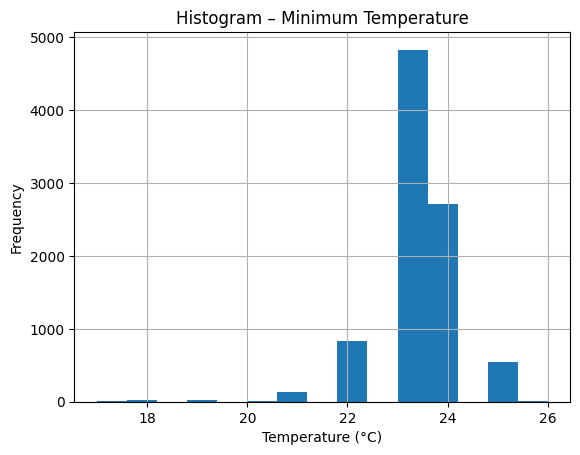

In [160]:
plt.figure()
df_weather["Temperatura Mínima"].hist(bins=15)
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Histogram – Minimum Temperature")
plt.show()

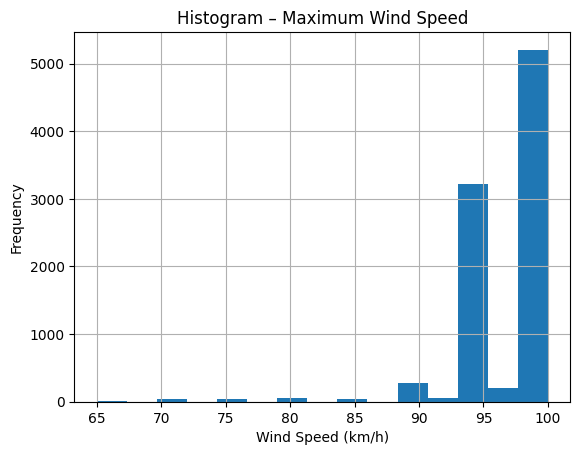

In [161]:
plt.figure()
df_weather["Vento Velocidade Máxima"].hist(bins=15)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.title("Histogram – Maximum Wind Speed")
plt.show()

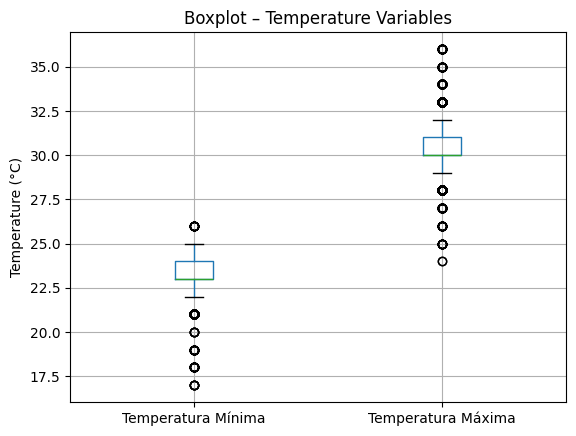

In [162]:
plt.figure()
df_weather.boxplot(column=["Temperatura Mínima", "Temperatura Máxima"])
plt.ylabel("Temperature (°C)")
plt.title("Boxplot – Temperature Variables")
plt.show()

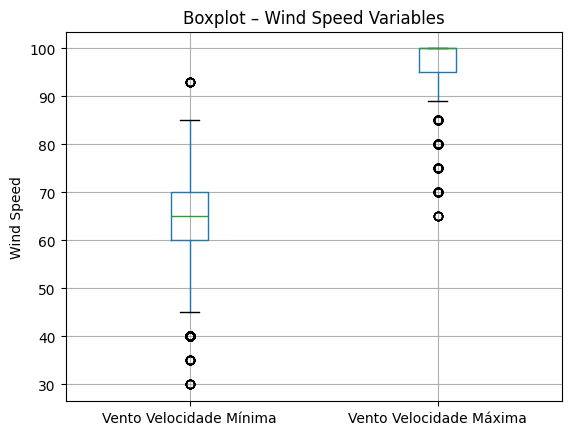

In [163]:
plt.figure()
df_weather.boxplot(column=[
    "Vento Velocidade Mínima",
    "Vento Velocidade Máxima"
])
plt.ylabel("Wind Speed")
plt.title("Boxplot – Wind Speed Variables")
plt.show()

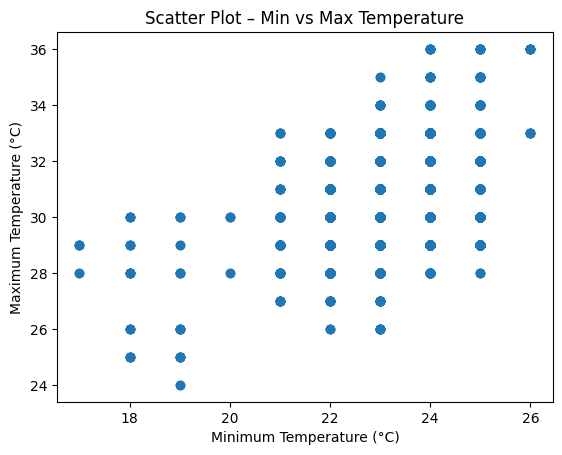

In [164]:
plt.figure()
plt.scatter(
    df_weather["Temperatura Mínima"],
    df_weather["Temperatura Máxima"]
)
plt.xlabel("Minimum Temperature (°C)")
plt.ylabel("Maximum Temperature (°C)")
plt.title("Scatter Plot – Min vs Max Temperature")
plt.show()

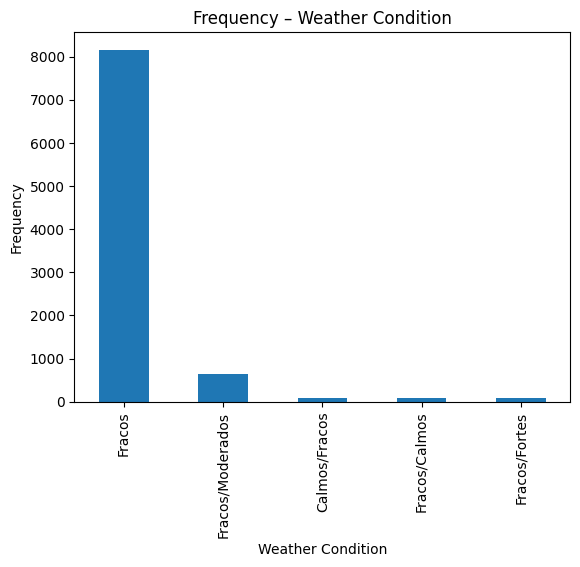

In [167]:
freq_weather = statistics_wind_intensity['Top Frequency']

plt.figure()
freq_weather.plot(kind="bar")
plt.xlabel("Weather Condition")
plt.ylabel("Frequency")
plt.title("Frequency – Weather Condition")
plt.show()

In [ ]:
df_weather["Data"] = pd.to_datetime(
    df_weather["Data"],
    dayfirst=True
)

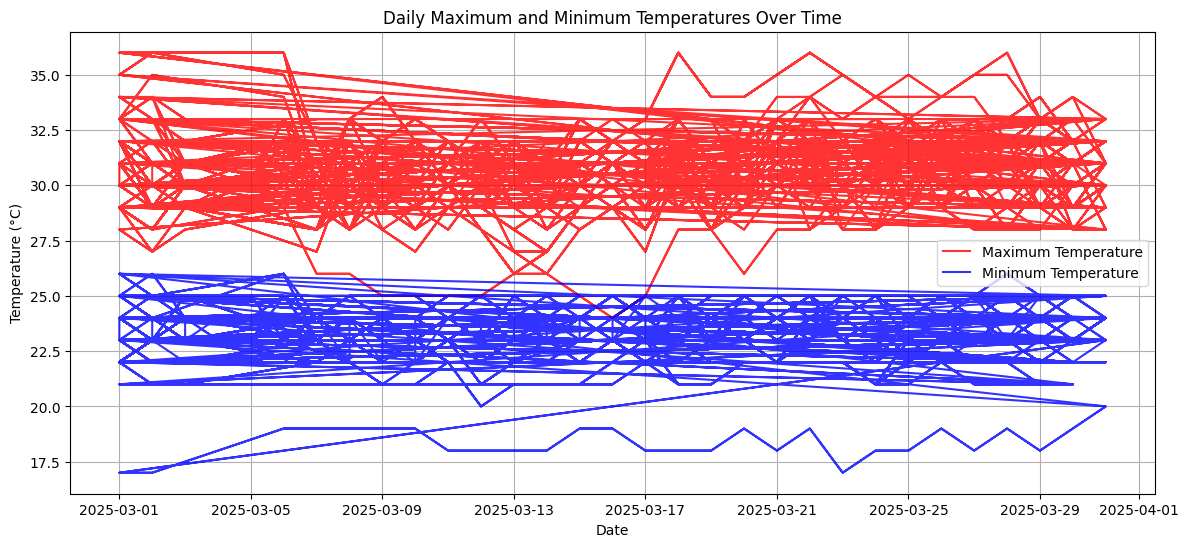

In [172]:
plt.figure(figsize=(14, 6))

plt.plot(
    df_weather["Data"],
    df_weather["Temperatura Máxima"],
    label="Maximum Temperature",
    color="red",
    alpha=0.8
)

plt.plot(
    df_weather["Data"],
    df_weather["Temperatura Mínima"],
    label="Minimum Temperature",
    color="blue",
    alpha=0.8
)

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Maximum and Minimum Temperatures Over Time")
plt.legend()
plt.grid(True)
plt.show()

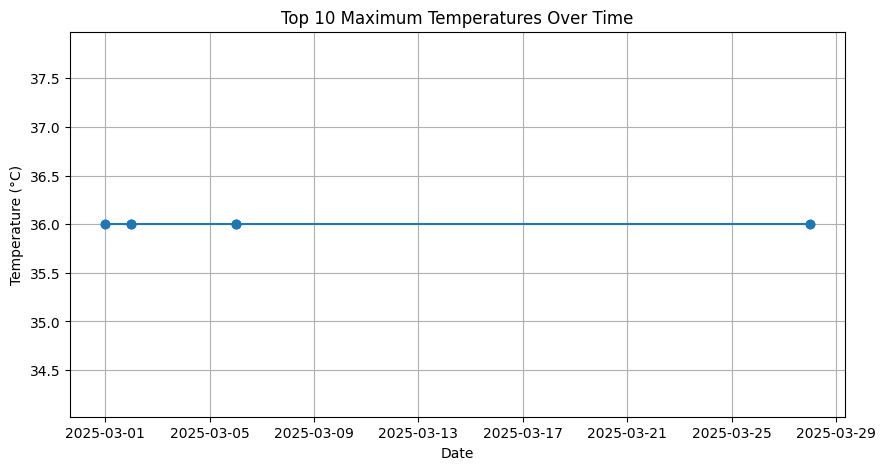

In [175]:
top_max_sorted = top_max.sort_values("Data")

plt.figure(figsize=(10, 5))
plt.plot(
    top_max_sorted["Data"],
    top_max_sorted["Temperatura Máxima"],
    marker="o"
)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Top 10 Maximum Temperatures Over Time")
plt.grid(True)
plt.show()

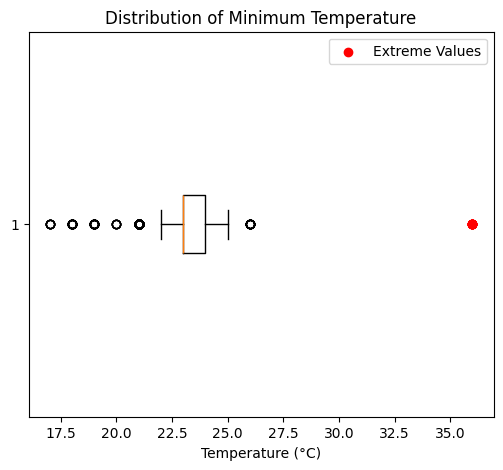

In [177]:
plt.figure(figsize=(6, 5))
plt.boxplot(df_weather["Temperatura Mínima"], vert=False)
plt.xlabel("Temperature (°C)")
plt.title("Distribution of Minimum Temperature")

plt.scatter(
    top_max["Temperatura Máxima"],
    [1]*len(top_max),
    color="red",
    label="Extreme Values"
)

plt.legend()
plt.show()

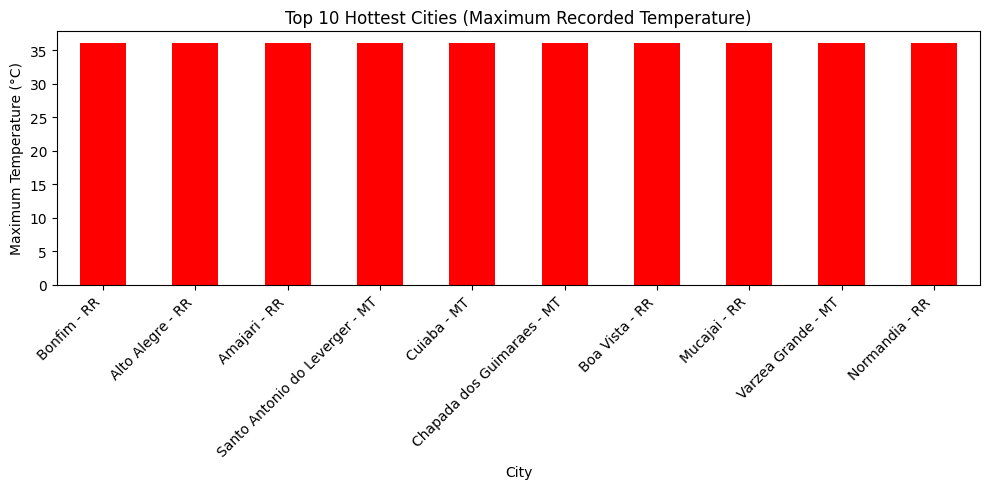

In [178]:
hot_cities = (
    df_weather
    .groupby("Cidade")["Temperatura Máxima"]
    .max()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10, 5))
hot_cities.plot(kind="bar", color="red")
plt.xlabel("City")
plt.ylabel("Maximum Temperature (°C)")
plt.title("Top 10 Hottest Cities (Maximum Recorded Temperature)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

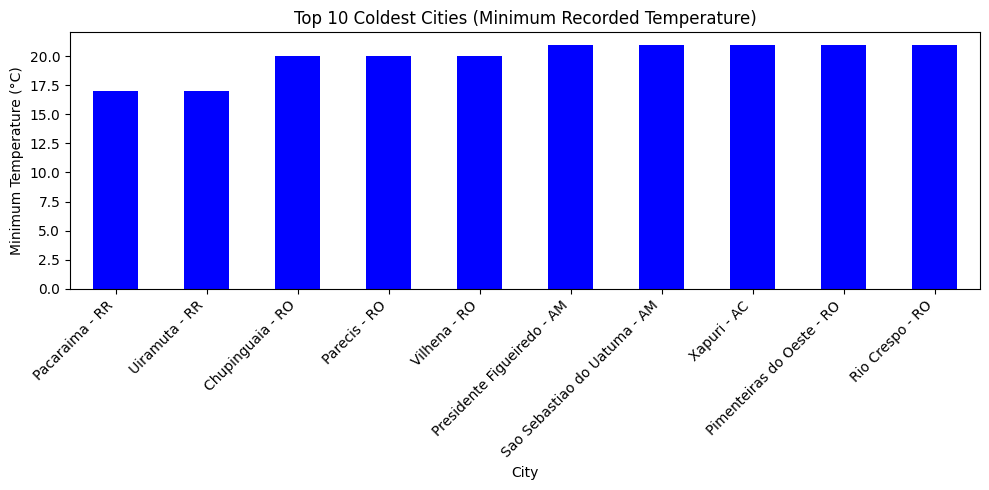

In [179]:
cold_cities = (
    df_weather
    .groupby("Cidade")["Temperatura Mínima"]
    .min()
    .sort_values()
    .head(10)
)
plt.figure(figsize=(10, 5))
cold_cities.plot(kind="bar", color="blue")
plt.xlabel("City")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Top 10 Coldest Cities (Minimum Recorded Temperature)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

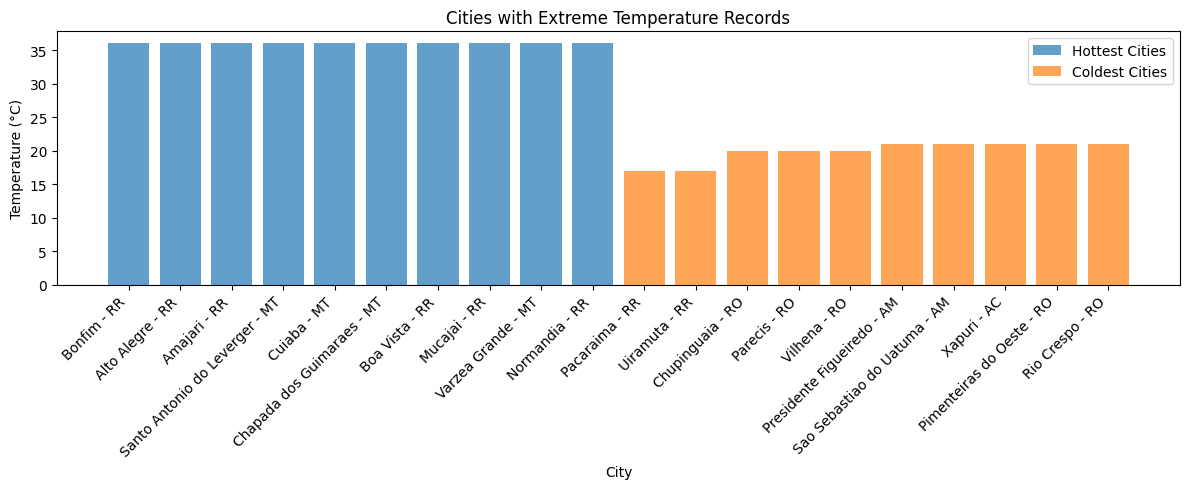

In [180]:
plt.figure(figsize=(12, 5))

plt.bar(
    hot_cities.index,
    hot_cities.values,
    label="Hottest Cities",
    alpha=0.7
)

plt.bar(
    cold_cities.index,
    cold_cities.values,
    label="Coldest Cities",
    alpha=0.7
)

plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Cities with Extreme Temperature Records")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()